In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel('./자료1.xlsx')
df2 = pd.read_excel('./자료2.xlsx')

df1 = df1.sort_values('시간')
df1['u'] = np.log(df1['종가']) - np.log(df1['종가'].shift(1))
df1_temp = df1.dropna()
s = df1_temp['u'].std()
historical_vol = s * (252**0.5)
#0.17321209276930946

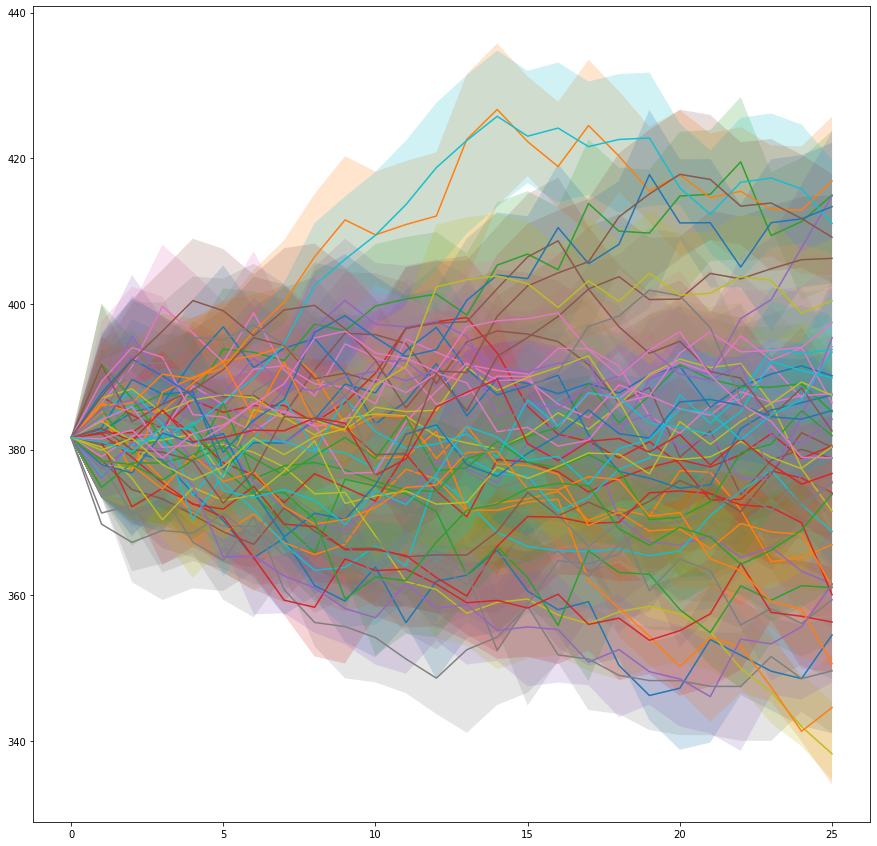

In [3]:
kospi = pd.read_excel('./자료1.xlsx', sheet_name='KOSPI200지수')
kospi= kospi.sort_values('시간')
kospi['change_rate'] = kospi['종가'].pct_change()
kospi_drop = kospi.dropna()
daily_avg_return=kospi_drop['change_rate'].mean()
expected_return = (1+daily_avg_return)**252 -1

paths={}
for i in range(50):
    path=[381.63]
    lower=[381.63]
    upper=[381.63]
    for j in range(25):
        lower.append(path[-1] + path[-1]*(expected_return*(1/252)+historical_vol*(-1.96)*((1/252)**0.5)))
        path.append(path[-1] + path[-1]*(expected_return*(1/252)+historical_vol*np.random.normal()*((1/252)**0.5)))
        upper.append(path[-1] + path[-1]*(expected_return*(1/252)+historical_vol*(1.96)*((1/252)**0.5)))
    paths[i]={'lower':lower, 'path':path, 'upper': upper}

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
for i in range(50):
    ex=pd.DataFrame(paths[i])
    ex=ex.reset_index()
    
    ax.fill_between(ex['index'], ex['upper'], ex['lower'], interpolate=True, alpha = 0.2)
    ax.plot(ex['index'], ex['path'])

In [5]:
up = np.exp(historical_vol*((1/252)**0.5))
down = 1/up
a = np.exp(0.0129*(1/252))
p = (a-down)/(up-down)


class Node:
    def __init__(self):
        self.s = 0
        self.f = 0

tree = [Node()]

for i in range(2046):
    tree.append(Node())

tree[0].s = 391.93

for i in range(1023):
    parent_s = tree[i].s
    tree[2*i+1].s = parent_s * up
    tree[2*i+2].s = parent_s * down
# 11월 25일부터 12월 9일까지 가격을 채워나감

for i in range(1023, 2047):
    tree[i].f = max(tree[i].s - 385, 0)
# 12월 9일에 있는 1024개 노드에 대해 옵션가 계산

for i in range(1022, -1, -1):
    tree[i].f = (p*tree[2*i+1].f + (1-p)*tree[2*i+2].f)/a
# 12월 9일부터 차례로 11월 25일까지 계산해나감

print(tree[0].f)

9.67032663207384


In [6]:
profit = []
for i in range(1000):
    price = 391.93
    for j in range(10):
        price += price*(0.0129*(1/252)+historical_vol*np.random.normal()*((1/252)**0.5))
    profit.append(max(price-385,0))

f = np.array(profit).mean() * np.exp(-0.0129 * (10/252))

In [7]:
f

9.547863778876726